In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [8]:
data = pd.read_csv('dataset_sdn.csv')

In [9]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [10]:
data.shape

(104345, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [12]:
##### Here we see that the label contains boolean values: 0 - Benign, 1-Maliciuous 
data.label.unique()

array([0, 1], dtype=int64)

In [13]:
data.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

<Axes: ylabel='count'>

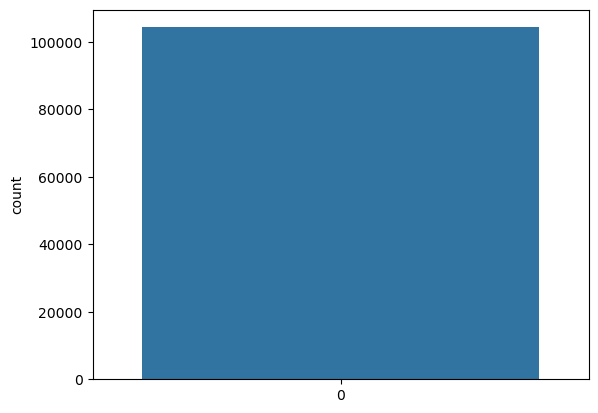

In [14]:
label_dict = dict(data.label.value_counts())
sns.countplot(data.label)

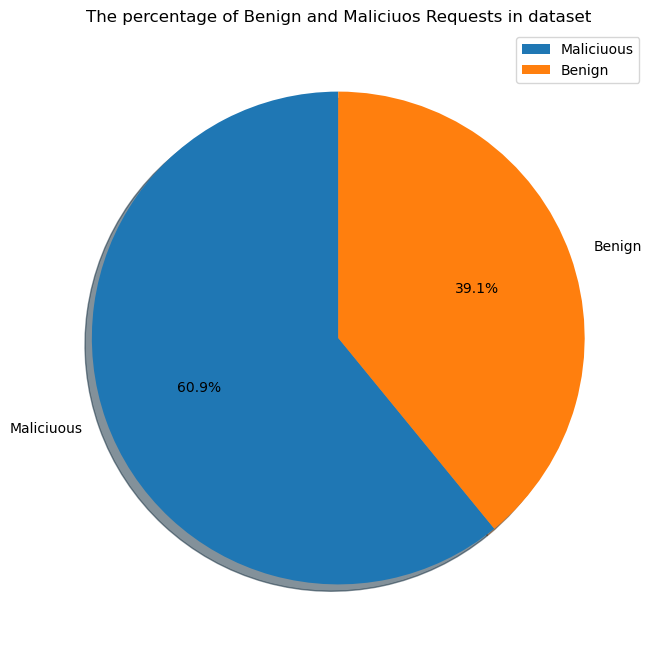

In [15]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [16]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features which has NuLL values')

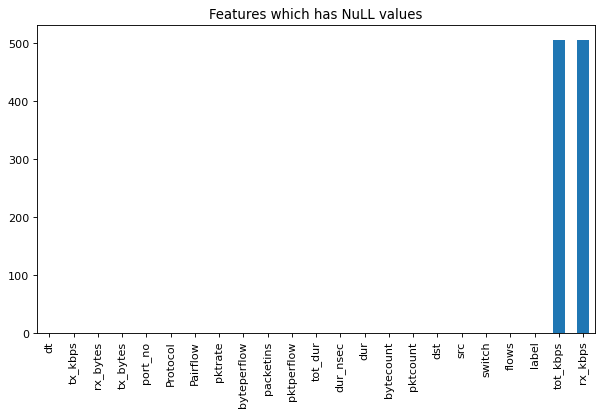

In [17]:
# Let's look at the vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [18]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [19]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [20]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

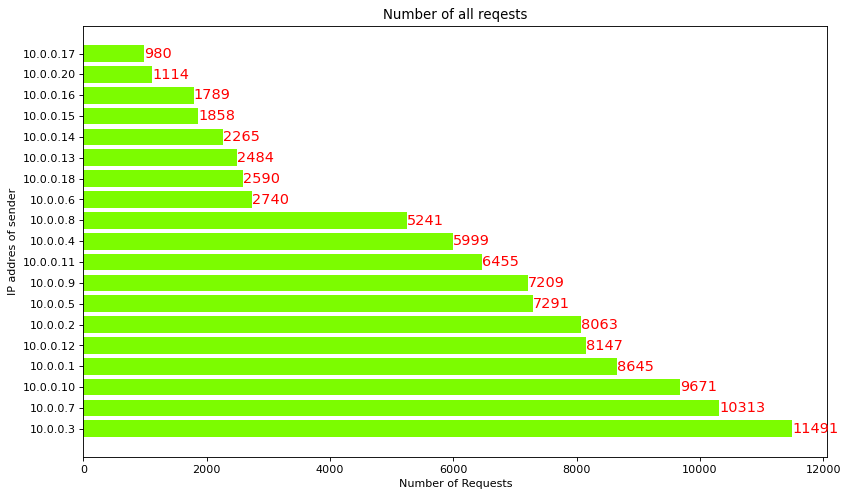

In [21]:
#### Let's look at Oblect columns (Source Destination Protocol)

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

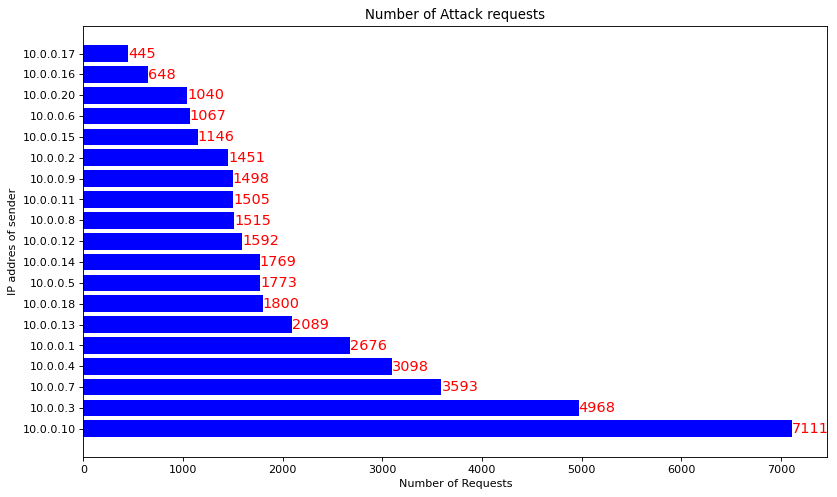

In [22]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

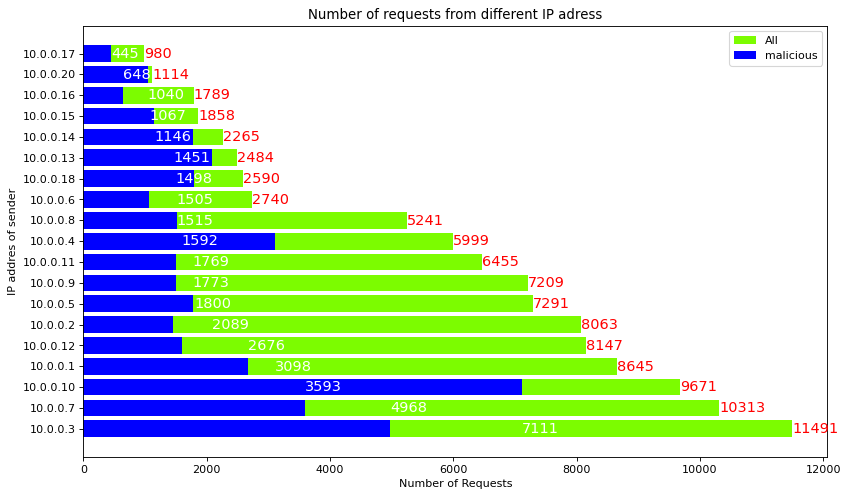

In [23]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

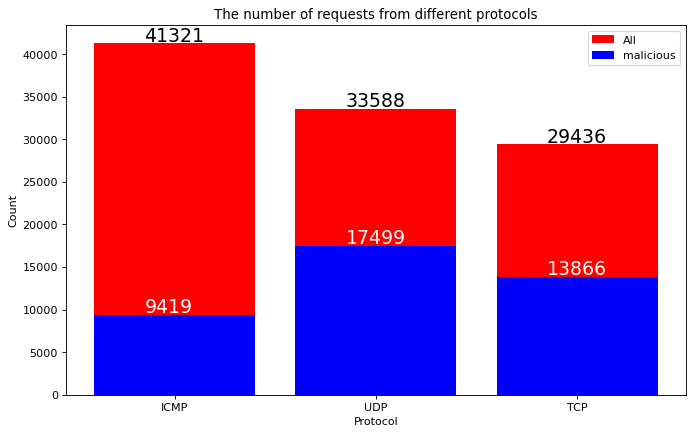

In [24]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [25]:
df = data.copy()

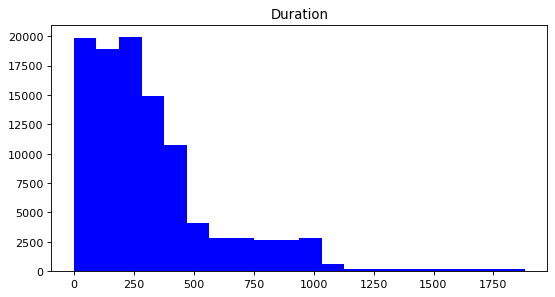

In [26]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

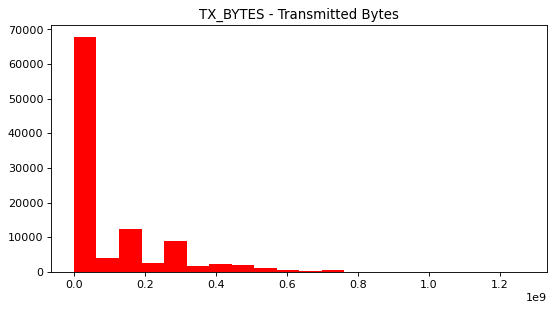

In [27]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

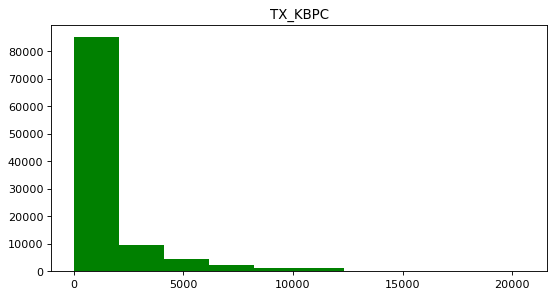

In [28]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

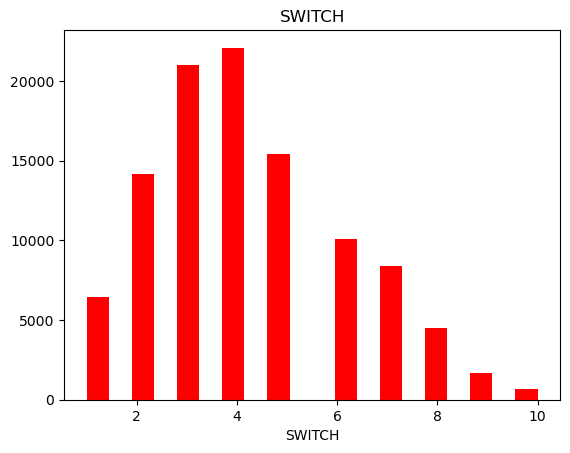

In [29]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

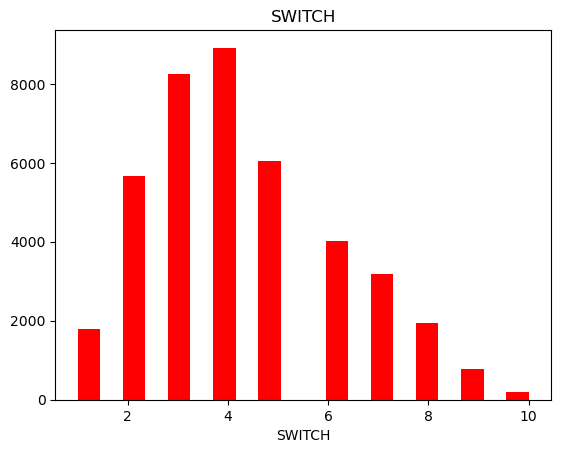

In [30]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

In [31]:
class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)  
    
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        
        
    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        #kernels = ['rbf']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel" : kernel, "accuracy": f"{round(accuracy_svm*100,2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0),2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)
        
        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('best kernel is : ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        
    def KNearetsNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        #print(accuracy_knn)
        for n in range(1,Ks):

            #Train Model and Predict  
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = metrics.accuracy_score(self.y_test, yhat)


            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        #print(accuracy_knn,'\n\n') # courseranyn ozinde tek osy gana jazylyp turdy
        #print(std_acc)
        #accuracy_knn[0] = 0
        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()
        
        
        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)
        
        knnc_search.fit(self.X_train, self.y_train)
        #print(knnc_search.best_params_)
        #print(knnc_search.best_score_)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)
        
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = metrics.accuracy_score(self.y_test, predicted_knn)
        print(f"Accuracy of KNN model {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        
    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)
        
        dt_search.fit(self.X_train, self.y_train)
        
        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']
        
        dtree = DecisionTreeClassifier(criterion=criterion, 
                                       max_depth=max_depth, 
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))
    
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        
        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))

"""
Decision Tree works Well
Suppert Vector Machine works well
Logistic Regression works well
KNN works well
Random Forest works well
"""

'\nDecision Tree works Well\nSuppert Vector Machine works well\nLogistic Regression works well\nKNN works well\nRandom Forest works well\n'

In [32]:
df = data.copy()
df = df.dropna()

In [33]:
X = df.drop(['dt','src','dst','label'], axis=1)
y = df.label

In [34]:
X = pd.get_dummies(X)

In [35]:
M = Model(X)

In [36]:
## Logistic Regression(Without FS)
M.LogisticRegression()

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20024
           1       0.66      0.72      0.69     11128

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 3.0929901599884033 seconds --- time for LogisticRegression


In [37]:
# ## Support Vector Machine(Without FS)
# M.SupportVectorMachine()

In [38]:
## Decision Tree(Without FS)
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.22%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18743
           1       0.99      0.97      0.98     12409

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 30.44755244255066 seconds ---


In [39]:
## Random Forest Classification(Without FS)
M.RandomForest()

C:\Users\POSEIDON\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18984
           1       1.00      1.00      1.00     12168

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152

########################################################################
--- 8.178447484970093 seconds ---


In [40]:
# M.KNearetsNeighbor()

In [41]:
df1 = data.copy()

In [42]:
df1 = df1.dropna()

In [43]:
df1.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [45]:
important_features = [
    'src',
    'pktcount',
    'dst',
    'byteperflow',
    'pktperflow',
    'pktrate',
    'tot_kbps',
    'rx_kbps',
    'flows',
    'bytecount',
    'dt',
    'Protocol',
    'dur',
    'tot_dur'
                      
                     ]


weights = [
    17.87,
    15.16,
    13.64,
    12.97,
    11.35,
    11.35,
    9.68,
    9.66,
    8.95,
    4.92,
    2.33,
    1.31,
    1.11,
    1.11
]

In [46]:
weighted_features = pd.DataFrame({'features':important_features,
                                 'weights':weights})
weighted_features

,features,weights
0,src,17.87
1,pktcount,15.16
2,dst,13.64
3,byteperflow,12.97
4,pktperflow,11.35
5,pktrate,11.35
6,tot_kbps,9.68
7,rx_kbps,9.66
8,flows,8.95
9,bytecount,4.92


In [47]:
### But we dont need src, dst, dt, So, we will drop them
X = df1[important_features]
y = df1.label

X = X.drop(['src', 'dst', 'dt'], axis=1)

In [48]:
X.head()

,pktcount,byteperflow,pktperflow,pktrate,tot_kbps,rx_kbps,flows,bytecount,Protocol,dur,tot_dur
0,45304,14428310,13535,451,0.0,0.0,3,48294064,UDP,100,1.010000e+11
1,126395,14424046,13531,451,0.0,0.0,2,134737070,UDP,280,2.810000e+11
2,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11
3,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11
4,90333,14427244,13534,451,0.0,0.0,3,96294978,UDP,200,2.010000e+11


In [49]:
# abs(X.corr())

In [50]:
# fig, ax = plt.subplots(figsize=(10,7)) 
# sns.heatmap(abs(X.corr()), annot=True)

In [51]:
## "dur" and "tot_dur"
## "pktperflow" and "pktrate"

X = X.drop(['dur', "pktrate", "pktperflow"], axis=1)

In [52]:
X.columns

Index(['pktcount', 'byteperflow', 'tot_kbps', 'rx_kbps', 'flows', 'bytecount',
       'Protocol', 'tot_dur'],
      dtype='object')

In [53]:
# fig, ax = plt.subplots(figsize=(10,7)) 
# sns.heatmap(abs(X.corr()), annot=True)

In [54]:
X = pd.get_dummies(X)

In [55]:
M = Model(X)

In [56]:
## Logistic Regression(With FS)
M.LogisticRegression()

C:\Users\POSEIDON\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\POSEIDON\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\POSEIDON\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy: 75.22% 

########################################################################
Best solver is :  sag
########################################################################
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     20969
           1       0.60      0.72      0.65     10183

    accuracy                           0.75     31152
   macro avg       0.73      0.74      0.73     31152
weighted avg       0.77      0.75      0.76     31152
 

########################################################################
--- 1.096618413925171 seconds --- time for LogisticRegression


In [57]:
# ## Support Vector Machine
# M.SupportVectorMachine()

In [58]:
M.RandomForest()

C:\Users\POSEIDON\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of RF is : 99.42% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18922
           1       1.00      0.99      0.99     12230

    accuracy                           0.99     31152
   macro avg       0.99      0.99      0.99     31152
weighted avg       0.99      0.99      0.99     31152

########################################################################
--- 6.483149290084839 seconds ---


In [59]:
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: gini, max depth: 6, max_leaf: 11
The Accuracy is : 94.19%
########################################################################
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     17287
           1       1.00      0.87      0.93     13865

    accuracy                           0.94     31152
   macro avg       0.95      0.94      0.94     31152
weighted avg       0.95      0.94      0.94     31152

########################################################################
--- 13.589949607849121 seconds ---


      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0     39

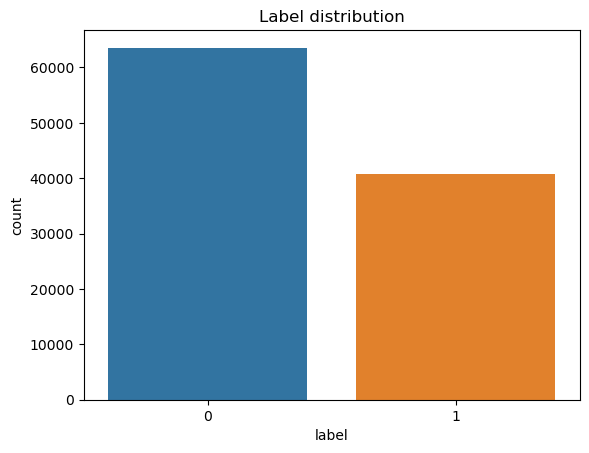

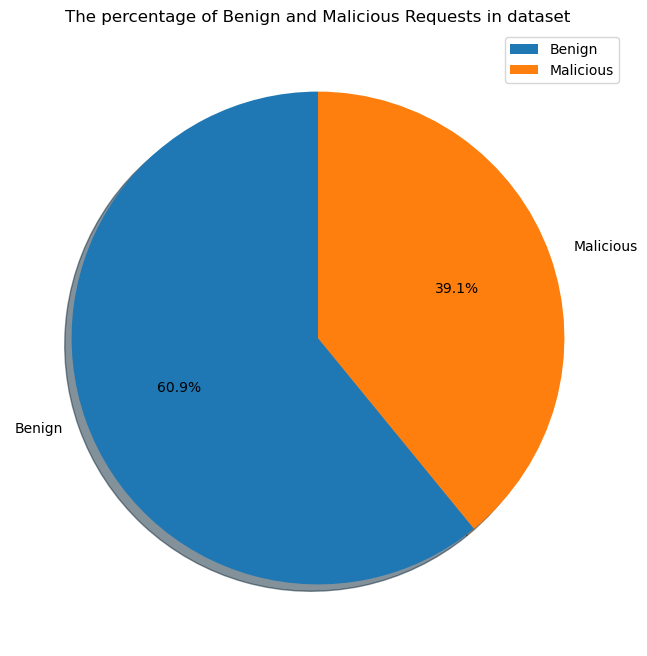

                  dt         switch       pktcount     bytecount  \
count  104345.000000  104345.000000  104345.000000  1.043450e+05   
mean    17927.514169       4.214260   52860.954746  3.818660e+07   
std     11977.642655       1.956327   52023.241460  4.877748e+07   
min      2488.000000       1.000000       0.000000  0.000000e+00   
25%      7098.000000       3.000000     808.000000  7.957600e+04   
50%     11905.000000       4.000000   42828.000000  6.471930e+06   
75%     29952.000000       5.000000   94796.000000  7.620354e+07   
max     42935.000000      10.000000  260006.000000  1.471280e+08   

                 dur      dur_nsec       tot_dur          flows  \
count  104345.000000  1.043450e+05  1.043450e+05  104345.000000   
mean      321.497398  4.613880e+08  3.218865e+11       5.654234   
std       283.518232  2.770019e+08  2.834029e+11       2.950036   
min         0.000000  0.000000e+00  0.000000e+00       2.000000   
25%       127.000000  2.340000e+08  1.270000e+11    

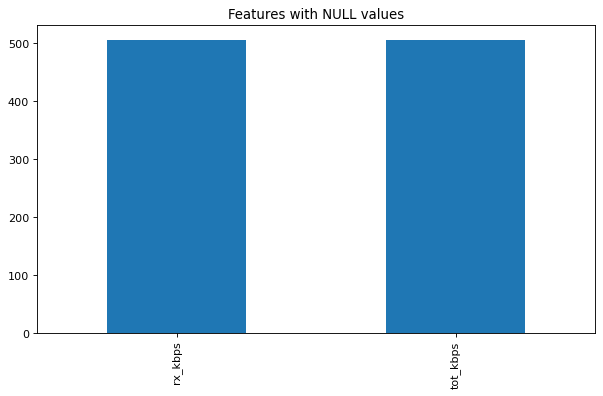

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64
Numeric Columns:  Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns:  Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3
        src       dst Protocol
0  10.0.0.1  10.0.0.8      UDP
1  10.0.0.1  10.0.0.8      UDP
2  10.0.0.2  10.0.0.8      UDP
3

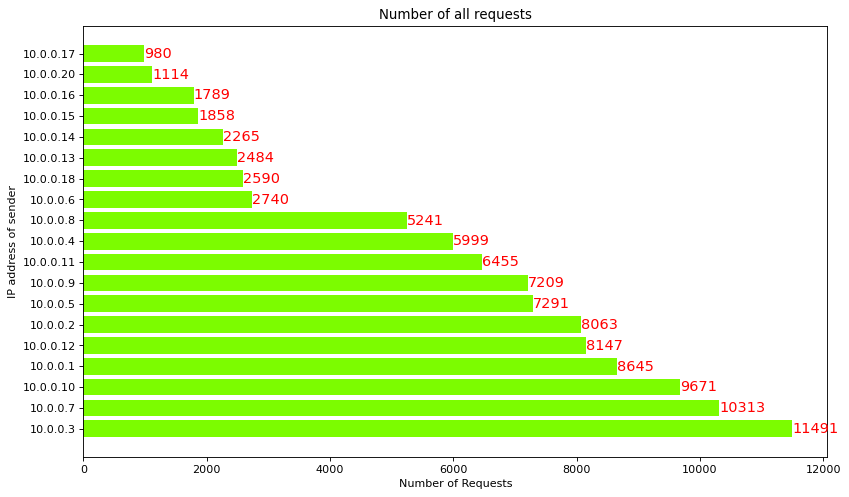

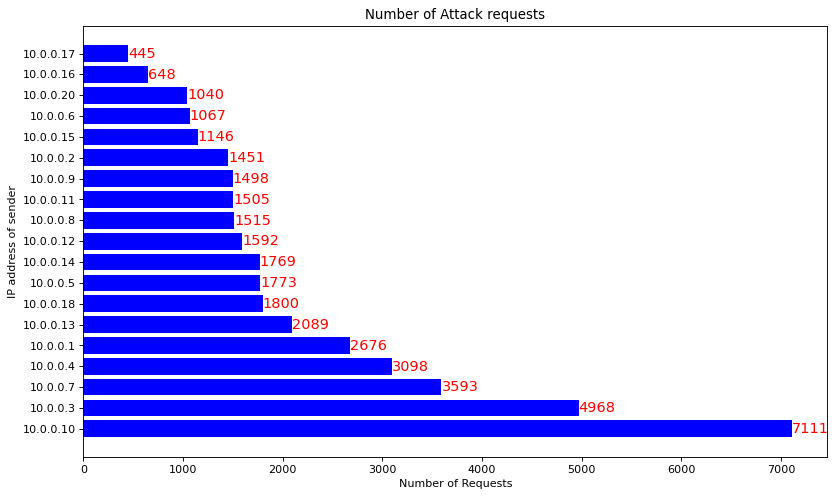

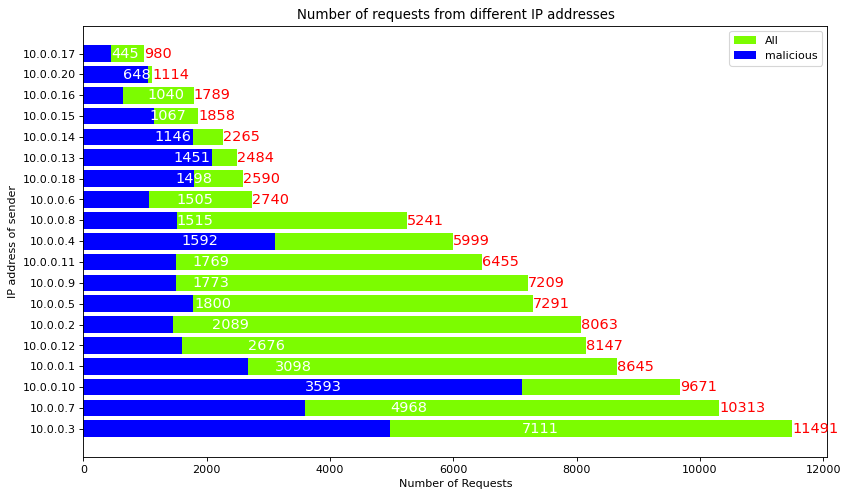

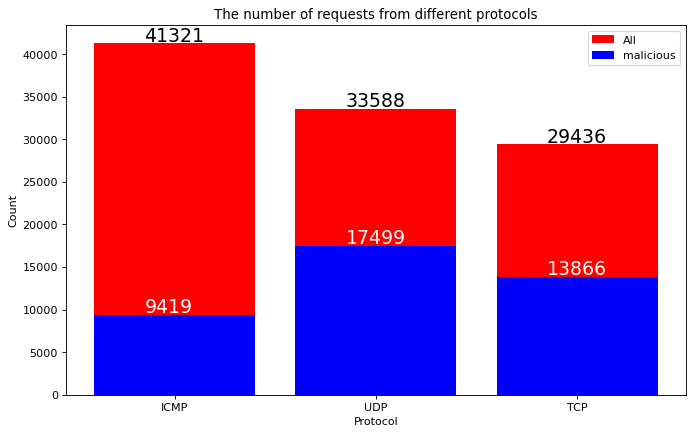

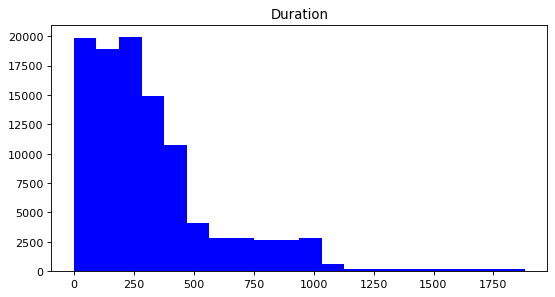

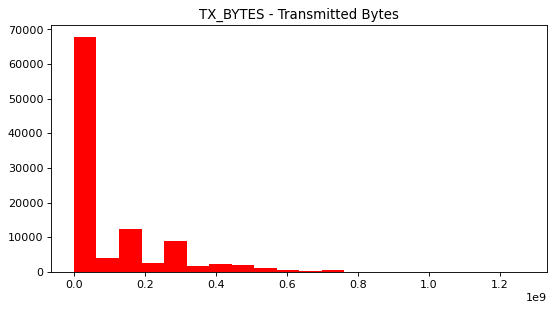

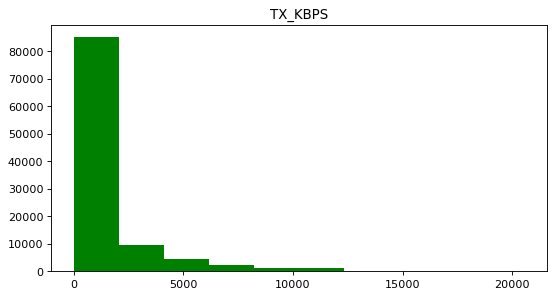

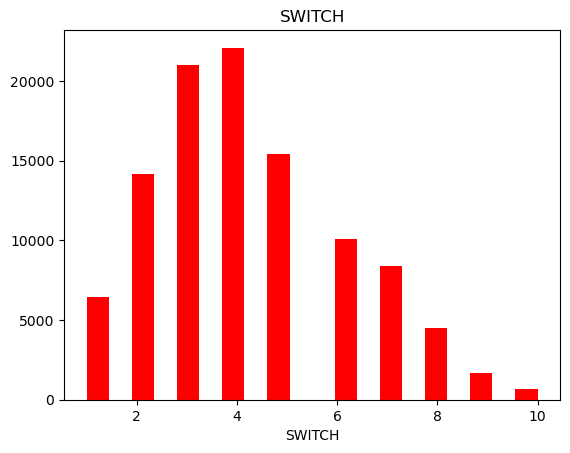

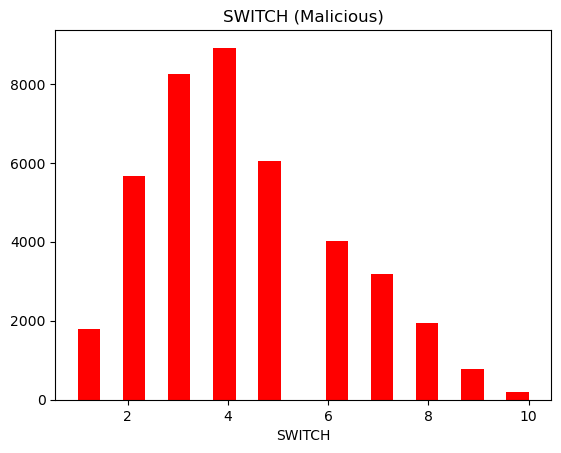

C:\Users\POSEIDON\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 83.84% 

########################################################################
Best solver is :  newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.89      0.85      0.87     20154
           1       0.75      0.82      0.78     11150

    accuracy                           0.84     31304
   macro avg       0.82      0.83      0.83     31304
weighted avg       0.84      0.84      0.84     31304
 

########################################################################
--- 8.378859519958496 seconds --- time for LogisticRegression
Accuracy: 97.88% 

########################################################################
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19189
           1       0.97      0.98      0.97     12115

    accuracy                           0.98     31304
   macro avg       0.98      0.98

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Load the dataset
data = pd.read_csv('dataset_sdn.csv')

# Data Analysis
print(data.head())
print(data.shape)
print(data.info())

# Check label distribution
label_dict = dict(data.label.value_counts())
print(data.label.unique())
print(data.label.value_counts())

# Plot label distribution
sns.countplot(x=data.label)
plt.title('Label distribution')
plt.show()

# Plot label distribution in pie chart
labels = ["Benign", "Malicious"]
sizes = [label_dict[0], label_dict[1]]
plt.figure(figsize=(13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(labels)
plt.title('The percentage of Benign and Malicious Requests in dataset')
plt.show()

# Describe dataset
print(data.describe())

# Plot null values
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() > 0]].isna().sum().sort_values().plot.bar()
plt.title("Features with NULL values")
plt.show()

print(data.isnull().sum())

# Identify numeric and object columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns

print('Numeric Columns: ', numeric_cols, '\n')
print('Object Columns: ', object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

print(object_df.head())

# Visualize object columns
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)
plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.title('Number of all requests')
plt.show()

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')
for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)
plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.title('Number of Attack requests')
plt.show()

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')
for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='r', size=13)
for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x=val, y=idx-0.2, s=str(val), color='w', size=13)
plt.xlabel('Number of Requests')
plt.ylabel('IP address of sender')
plt.legend(['All', 'malicious'])
plt.title('Number of requests from different IP addresses')
plt.show()

figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')
plt.text(x=0-0.15, y=41321+200, s=str(41321), color='black', size=17)
plt.text(x=1-0.15, y=33588+200, s=str(33588), color='black', size=17)
plt.text(x=2-0.15, y=29436+200, s=str(29436), color='black', size=17)
plt.text(x=0-0.15, y=9419+200, s=str(9419), color='w', size=17)
plt.text(x=1-0.15, y=17499+200, s=str(17499), color='w', size=17)
plt.text(x=2-0.15, y=13866+200, s=str(13866), color='w', size=17)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')
plt.show()

df = data.copy()

# Histograms for numeric features
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPS')
plt.show()

plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH (Malicious)')
plt.xlabel('SWITCH')
plt.show()

# Machine Learning Models
class Model:
    def __init__(self, data):
        self.data = data.drop(columns=['label'])
        self.labels = data['label']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.data, self.labels, random_state=42, test_size=0.3)
        self.preprocess()
        
    def preprocess(self):
        numeric_features = self.data.select_dtypes(include=['int64', 'float64']).columns
        categorical_features = self.data.select_dtypes(include=['object']).columns
    
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Adding imputer for numeric features
            ('scaler', StandardScaler())
        ])
    
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Adding imputer for categorical features
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])
    
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        self.X_train = self.preprocessor.fit_transform(self.X_train)
        self.X_test = self.preprocessor.transform(self.X_test)


    def LogisticRegression(self):
        start_time = time.time()
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            results_lr.append({'solver': solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                               'Coefficients': {'W': LR.coef_, 'b': LR.intercept_}})
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train, self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        
    # def SupportVectorMachine(self):
    #     start_time = time.time()
    #     accuracy_list = []
    #     result_svm = []
    #     kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    #     for kernel in kernels:
    #         SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
    #         predicted_svm = SVM.predict(self.X_test)
    #         accuracy_svm = accuracy_score(self.y_test, predicted_svm)
    #         accuracy_list.append(accuracy_svm)
    #         result_svm.append({'kernel': kernel, 'accuracy': str(round(accuracy_svm * 100, 2)) + "%"})

    #     best_kernel = kernels[accuracy_list.index(max(accuracy_list))]
    #     SVM = svm.SVC(kernel=best_kernel).fit(self.X_train, self.y_train)
    #     predicted_svm = SVM.predict(self.X_test)
    #     accuracy_svm = accuracy_score(self.y_test, predicted_svm)
    #     print("Accuracy: %.2f%%" % (accuracy_svm * 100.0), '\n')
    #     print("########################################################################")
    #     print('Best kernel is : ', best_kernel)
    #     print("########################################################################")
    #     print(classification_report(predicted_svm, self.y_test), '\n')
    #     print("########################################################################")
    #     print("--- %s seconds --- time for SupportVectorMachine" % (time.time() - start_time))
        
    def KNN(self):
        start_time = time.time()
        KNN = KNeighborsClassifier(n_neighbors=7).fit(self.X_train, self.y_train)
        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = accuracy_score(self.y_test, predicted_knn)
        print("Accuracy: %.2f%%" % (accuracy_knn * 100.0), '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for KNN" % (time.time() - start_time))
        
    def DecisionTree(self):
        start_time = time.time()
        DT = DecisionTreeClassifier(criterion="entropy", max_depth=5).fit(self.X_train, self.y_train)
        predicted_dt = DT.predict(self.X_test)
        accuracy_dt = accuracy_score(self.y_test, predicted_dt)
        print("Accuracy: %.2f%%" % (accuracy_dt * 100.0), '\n')
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for DecisionTree" % (time.time() - start_time))
        
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(n_estimators=100, max_depth=5).fit(self.X_train, self.y_train)
        predicted_rf = RF.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)
        print("Accuracy: %.2f%%" % (accuracy_rf * 100.0), '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for RandomForest" % (time.time() - start_time))

# Initialize the model
model = Model(data)

# Test the methods
model.LogisticRegression()

model.KNN()
model.DecisionTree()
model.RandomForest()

# model.SupportVectorMachine()
